In [1]:
# --- from Yoshi (Jan 17, 2024)
# (-CO2_dif_exp-CO2_rsp_exp)-(-CO2_dif_spn-CO2_rsp_spn) - 0.14*(CO2_adv_exp - CO2_adv_spn).
# In the above equation CO2_dif denotes face values in the "diff" column for int_flux_gas-pco2.txt file,  
# CO2_adv in the column of "adv", CO2_rsp in the "g2" column (OM phase considered).  
# "exp" denotes ERW experiments while spn controls/spin-ups.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import re
import glob
from matplotlib.gridspec import GridSpec
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable

# --- 
runtype = "field"   # field or lab
runname_ctrl = ["hifert_cc_311a_0p0_cc_field_tau15p0"]
# runname_ctrl = ["run1s_gbas_0p0_gbas_field_tau70p0"]
# runname_ctrl = ["run1_0p0_cc_field_tau70p0"]
# runname_ctrl = ["meanAnnliming_noFert_s311_hist_fixedRate_fickmix_site_311_1950-2020_app-0p0_cc_field_tau70p0"]
# runname_ctrl = ["liming_noFert_s311_hist_fixedRate_fickmix_site_311_1950-2020_app-0p0_cc_field_tau70p0"]
# runname_ctrl = ["liming_noFert_hist_fixedRate_fickmix_site_311_1950-2020_app-0p0_cc_field_tau70p0"]
# runname_ctrl = ["liming_noFert_hist_fixedRate_site_311_1950-2020_app-0p0_cc_field_tau70p0"]
# runname_ctrl = ["meanAnn_liming_shortRun_noFert_fixedRate_site_311_app-0_cc_field_tau70p0"]

# runname_ctrl = ["meanAnn_liming_noFert_fixedRate_site_311_app-0p0_cc_field_tau70p0", "meanAnn_liming_noFert_fixedRate_site_411_app-0p0_cc_field_tau70p0"]
# runname_ctrl = ["meanAnn_basalt_noFert_fixedRate_site_311_app-0p0_cc_field_tau70p0", "meanAnn_basalt_noFert_fixedRate_site_411_app-0p0_cc_field_tau70p0"]
# runname_ctrl = ["liming_noFert_hist_fixedRate_site_311_1950-2020_app-0p0_cc_field_tau70p0", "liming_noFert_hist_fixedRate_site_411_1950-2020_app-0p0_cc_field_tau70p0"]
# runname_ctrl = ["basalt_noFert_hist_fixedRate_site_311_1950-2020_app-0p0_gbas_field_tau70p0", "basalt_noFert_hist_fixedRate_site_411_1950-2020_app-0p0_gbas_field_tau70p0"]
outdir = "/home/tykukla/SCEPTER/scepter_output"

# ---
# set variable file
var_fn = "flx_gas"  # ["flx_gas" or "flx_co2sp"]
# set cdr variable
cdr_var = "pco2"  # if using *flx_co2sp: [DIC, co2g] ; if using *flx_gas: [pco2]

In [2]:
# --- read in the batch .csv 
# csv_fn = "liming_noFert_hist_fixedRate_vg2-imix-1.csv"
csv_fn = "meanAnn_liming_shortRun_hiFert_fixedRate_v1.csv"
# csv_fn = "liming_noFert_hist_fixedRate_v1.csv"
# csv_fn = "liming_noFert_hist_fixedRate_v4-imix-1.csv"
# csv_fn = "basalt_noFert_hist_fixedRate_v4-imix-1.csv"
# csv_fn = "liming_noFert_hist_fixedRate_v4-imix-seasonal-1.csv"
# csv_fn = "basalt_noFert_hist_fixedRate_v4-imix-seasonal-1.csv"
# csv_fn = "meanAnn_liming_shortRun_noFert_fixedRate_v0.csv"

# csv_fn = "meanAnn_liming_noFert_fixedRate_v0.csv"
# csv_fn = "liming_noFert_hist_fixedRate_v0.csv" # "liming_noFert_hist_fixedRate_v0_first20.csv"
# csv_fn = "basalt_noFert_hist_fixedRate_v0.csv" 
csv_loc = "/home/tykukla/aglime-swap-cdr/scepter/batch-inputs"
dfin = pd.read_csv(os.path.join(csv_loc, csv_fn))

# add column for the full run id
dfin["newrun_id_full"] = dfin['newrun_id'] + "_" + dfin['dustsp'] + "_" + runtype + "_tau"+dfin["duration"].astype(float).astype(str).str.replace(".", "p")  # (duration has to be turned into float first because otherwise we miss the decimal pt)
# identify the control run
dfin["ctrl_run"] = dfin['newrun_id_full'].isin(runname_ctrl)

# add a column for the dustrate in ton_ha_yr
if "dustrate" in dfin.columns:
    dfin["dustrate_ton_ha_yr"] = dfin["dustrate"] / 100

In [3]:
# dfin=dfin.loc[dfin['spinrun'] == "site_311_spintuneup"]   # if we just want to isolate site 311
dfin

,duration,singlerun_seasonality,cec,dustsp,dustsp_2nd,dustrate,dustrate_2nd,dustrad,add_secondary,spinrun,imix,include_psd_full,include_psd_bulk,newrun_id,climatedir,climatefiles,newrun_id_full,ctrl_run,dustrate_ton_ha_yr
0,15,False,21.10329,cc,amnt,0.0,30.0,150,False,site_311a_pr7_spintuneup4,1,False,False,hifert_cc_311a_0p0,NaN,site_311a,hifert_cc_311a_0p0_cc_field_tau15p0,True,0.0
1,15,False,21.10329,cc,amnt,20.0,30.0,150,False,site_311a_pr7_spintuneup4,1,False,False,hifert_cc_311a_0p2,NaN,site_311a,hifert_cc_311a_0p2_cc_field_tau15p0,False,0.2
2,15,False,21.10329,cc,amnt,40.0,30.0,150,False,site_311a_pr7_spintuneup4,1,False,False,hifert_cc_311a_0p4,NaN,site_311a,hifert_cc_311a_0p4_cc_field_tau15p0,False,0.4
3,15,False,21.10329,cc,amnt,60.0,30.0,150,False,site_311a_pr7_spintuneup4,1,False,False,hifert_cc_311a_0p6,NaN,site_311a,hifert_cc_311a_0p6_cc_field_tau15p0,False,0.6
4,15,False,21.10329,cc,amnt,80.0,30.0,150,False,site_311a_pr7_spintuneup4,1,False,False,hifert_cc_311a_0p8,NaN,site_311a,hifert_cc_311a_0p8_cc_field_tau15p0,False,0.8
5,15,False,21.10329,cc,amnt,100.0,30.0,150,False,site_311a_pr7_spintuneup4,1,False,False,hifert_cc_311a_1p0,NaN,site_311a,hifert_cc_311a_1p0_cc_field_tau15p0,False,1.0
6,15,False,21.10329,cc,amnt,200.0,30.0,150,False,site_311a_pr7_spintuneup4,1,False,False,hifert_cc_311a_2p0,NaN,site_311a,hifert_cc_311a_2p0_cc_field_tau15p0,False,2.0
7,15,False,21.10329,cc,amnt,300.0,30.0,150,False,site_311a_pr7_spintuneup4,1,False,False,hifert_cc_311a_3p0,NaN,site_311a,hifert_cc_311a_3p0_cc_field_tau15p0,False,3.0
8,15,False,21.10329,cc,amnt,700.0,30.0,150,False,site_311a_pr7_spintuneup4,1,False,False,hifert_cc_311a_10p0,NaN,site_311a,hifert_cc_311a_10p0_cc_field_tau15p0,False,7.0
9,15,False,21.10329,cc,amnt,1200.0,30.0,150,False,site_311a_pr7_spintuneup4,1,False,False,hifert_cc_311a_20p0,NaN,site_311a,hifert_cc_311a_20p0_cc_field_tau15p0,False,12.0


In [19]:
# [FOR NOW ONLY LOOK AT THE CONTROL AND ONE OTHER ROW]
# runname_case = "liming_noFert_hist_fixedRate_site_311_1950-2020_app-5p0_cc_field_tau70p0"
# dfin = dfin[(dfin['newrun_id_full'] == runname_case) | (dfin['newrun_id_full'] == runname_ctrl)]
# dfin

In [4]:
# --- FUNCTION to preprocess .txt files for consistent delimiters
def preprocess_txt(file_path):
    data = []  # Initialize a list to store the processed data

    # Initialize a flag to determine if we are reading the header
    is_header = True

    # Read the file line by line and process the data
    with open(file_path, 'r') as file:
        for line in file:
            line = line.strip()  # Remove leading/trailing whitespace
            if is_header:
                # Split the first line into column names
                column_names = re.split(r'\s+', line)
                is_header = False
            else:
                # Split the other lines into data values
                values = re.split(r'\s+', line)
                data.append(values)

    # Create a DataFrame with the processed data and set column names
    df = pd.DataFrame(data, columns=column_names)
    # get df as numeric if it's not already
    df = df.map(pd.to_numeric)
    # return
    return df

In [5]:
# --- read in flux data 
# define file name pattern
df = pd.DataFrame()  # initialize empty df to store dat
fn_pref = [("int_"+var_fn), var_fn] # ["int_flx_co2sp", "flx_co2sp"]   # will read in all species unless fn_varInclude is defined
fn_varInclude = []
varCheck = True if len(fn_varInclude) > 0 else False
fn_ext = ".txt"


# loop through runs
for run in range(len(dfin)):
    tdf = dfin.iloc[run]
    this_path = os.path.join(outdir, tdf['newrun_id_full'])
    flx_path, prof_path = os.path.join(this_path, "flx"), os.path.join(this_path, "prof")

    print("now reading in run " + str(run + 1) + " of " + str(len(dfin)) + "...")
    for fset in fn_pref:
        # set pattern
        fn_pattern = f"{fset}-*{fn_ext}"
        # get list of filenames
        file_paths = glob.glob(f"{flx_path}/{fn_pattern}")
    
        # read in data and concatenate
        for file_path in file_paths:
            # get the variable 
            varpattern = re.escape(fset) + r'-(.*?).txt'
            varmatch = re.search(varpattern, file_path)
            var = varmatch.group(1)
            # skip this step if it's not in the include arr
            if varCheck:
                if var not in fn_varInclude:
                    continue
            # read in
            dfi = preprocess_txt(file_path)
            # apply pd.to_numeric to all columns using the "map" method
            dfi = dfi.map(pd.to_numeric)
            # add set, var, spinrun, ctrl
            dfi["set"] = fset
            dfi["var"] = var
            dfi["spinrun"] = tdf["spinrun"]
            dfi["runname"] = tdf["newrun_id_full"]
            try:
                dfi["site"] = re.search(r'site_(\d{3})', tdf['newrun_id_full'])[0]
            except:
                dfi["site"] = tdf['climatefiles']
            dfi["ctrl"] = tdf["ctrl_run"]
            if "dustrate_ton_ha_yr" in tdf.index:
                dfi["dustrate_ton_ha_yr"] = tdf["dustrate_ton_ha_yr"]
            # combine
            df = pd.concat([df, dfi], ignore_index=True)

# drop all time slices dangerously close to zero (these produce astronomical (like 10^10 or higher) residuals)
df = df.loc[df['time'] > 1e-3]

# sort by time and depth
df = df.sort_values(by=["runname", "site", "var", "time"])
df

now reading in run 1 of 22...
now reading in run 2 of 22...
now reading in run 3 of 22...
now reading in run 4 of 22...
now reading in run 5 of 22...
now reading in run 6 of 22...
now reading in run 7 of 22...
now reading in run 8 of 22...
now reading in run 9 of 22...
now reading in run 10 of 22...
now reading in run 11 of 22...
now reading in run 12 of 22...
now reading in run 13 of 22...
now reading in run 14 of 22...
now reading in run 15 of 22...
now reading in run 16 of 22...
now reading in run 17 of 22...
now reading in run 18 of 22...
now reading in run 19 of 22...
now reading in run 20 of 22...
now reading in run 21 of 22...
now reading in run 22 of 22...


,time,tflx,adv,dif,rain,cc,amnt,g2,inrt,res,set,var,spinrun,runname,site,ctrl,dustrate_ton_ha_yr
2,0.001251,-0.031185,0.636887,23.401639,0.0,-5.538194e-14,0.0,-24.007341,0.0,-7.801071e-10,int_flx_gas,pco2,site_311a_pr7_spintuneup4,hifert_cc_311a_0p0_cc_field_tau15p0,site_311a,True,0.0
66,0.001251,-0.055933,0.636887,23.426388,0.0,-2.022264e-15,0.0,-24.007341,0.0,-2.245751e-13,flx_gas,pco2,site_311a_pr7_spintuneup4,hifert_cc_311a_0p0_cc_field_tau15p0,site_311a,True,0.0
3,0.003751,-0.043595,0.636886,23.414049,0.0,-1.908995e-14,0.0,-24.007341,0.0,-2.602195e-10,int_flx_gas,pco2,site_311a_pr7_spintuneup4,hifert_cc_311a_0p0_cc_field_tau15p0,site_311a,True,0.0
67,0.003751,-0.020464,0.636885,23.390920,0.0,-2.714003e-16,0.0,-24.007340,0.0,-1.631445e-13,flx_gas,pco2,site_311a_pr7_spintuneup4,hifert_cc_311a_0p0_cc_field_tau15p0,site_311a,True,0.0
4,0.006251,-0.036185,0.636884,23.406641,0.0,-1.147491e-14,0.0,-24.007340,0.0,-1.566351e-10,int_flx_gas,pco2,site_311a_pr7_spintuneup4,hifert_cc_311a_0p0_cc_field_tau15p0,site_311a,True,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2423,13.750001,0.125689,1.335543,20.517926,0.0,-7.908651e-01,0.0,-21.188292,0.0,4.729959e-07,flx_gas,pco2,site_311b_pr7_spintuneup4,hifert_cc_311b_3p0_cc_field_tau15p0,site_311b,False,3.0
2360,14.375001,0.014118,1.501623,22.065113,0.0,-9.804650e-01,0.0,-22.600389,0.0,1.149384e-07,int_flx_gas,pco2,site_311b_pr7_spintuneup4,hifert_cc_311b_3p0_cc_field_tau15p0,site_311b,False,3.0
2424,14.375001,-0.022259,1.341146,20.756111,0.0,-9.947850e-01,0.0,-21.080213,0.0,2.025319e-11,flx_gas,pco2,site_311b_pr7_spintuneup4,hifert_cc_311b_3p0_cc_field_tau15p0,site_311b,False,3.0
2361,15.000000,0.017881,1.493942,21.996456,0.0,-9.735485e-01,0.0,-22.534730,0.0,1.149086e-07,int_flx_gas,pco2,site_311b_pr7_spintuneup4,hifert_cc_311b_3p0_cc_field_tau15p0,site_311b,False,3.0


In [6]:
# 

In [7]:
# --- calculate CDR 
allsites = df['site'].unique() 

# initialize columns to fill
# define the variable names for saving 
dif_c = "cdr_dif_component"
resp_c = "cdr_resp_component"
adv_c = "cdr_adv_component"
dif = "cdr_dif"
adv = "cdr_adv"

df[dif_c], df[resp_c], df[adv_c], df[dif], df[adv] = -9999., -9999., -9999., -9999., -9999.

# loop through each site
for site in allsites:
    dfsite = df.loc[df['site'] == site]
    # get control run
    dfsite_ctrl = dfsite.loc[dfsite['ctrl'] == True]
    dfsite_notctrl = dfsite.loc[dfsite['ctrl'] == False]

    # loop through non-control runs
    nonctrl_runs = dfsite_notctrl['runname'].unique()
    for trun in nonctrl_runs:
        print(trun)
        # split into case and control
        tdf_case = dfsite_notctrl.loc[(dfsite_notctrl['var'] == cdr_var) & (dfsite_notctrl['runname'] == trun)]
        tdf_ctrl = dfsite_ctrl.loc[(dfsite_ctrl['var'] == cdr_var)]
        # compute cdr 
        # loop through sets
        sets = tdf_case['set'].unique()
        for thisset in sets:
            ttdf_case = tdf_case.loc[tdf_case['set'] == thisset]
            ttdf_ctrl = tdf_ctrl.loc[tdf_ctrl['set'] == thisset]
            
            # if case and control are different lengths, we need to interpolate
            # (this happens sometimes due to shifts in how the timesteps are handled in a given run)
            if len(ttdf_case) != len(tdf_ctrl):
                ctrl_dif = ttdf_ctrl.set_index('time')['dif'].reindex(ttdf_case['time']).interpolate(method='linear').values
                ctrl_resp = ttdf_ctrl.set_index('time')['g2'].reindex(ttdf_case['time']).interpolate(method='linear').values
                ctrl_adv = ttdf_ctrl.set_index('time')['adv'].reindex(ttdf_case['time']).interpolate(method='linear').values
            else:
                ctrl_dif = ttdf_ctrl['dif'].values
                ctrl_resp = ttdf_ctrl['g2'].values
                ctrl_adv = ttdf_ctrl['adv'].values

            # --------
            # [TROUBLESHOOT] -- what happens if we set the ctrl equal to some mean initial state??
            # ctrl_dif = ttdf_ctrl['dif'][3:10].values.mean()
            # ctrl_resp = ttdf_ctrl['g2'][3:10].values.mean()
            # ctrl_adv = ttdf_ctrl['adv'][3:10].values.mean()
            # [TROUBLESHOOT] -- what happens ctrl fluxes are zero
            # ctrl_dif = 0
            # ctrl_resp = 0
            # ctrl_adv = 0
            # --------
            
            # get each component
            dif_component = -1*(ttdf_case['dif'].values - ctrl_dif)
            resp_component = -1*(ttdf_case['g2'].values - ctrl_resp)
            adv_component = ttdf_case['adv'].values - ctrl_adv
            
            # compute dif and adv versions
            cdr_dif = dif_component + np.minimum(resp_component, 0)
            cdr_adv = adv_component + np.minimum(resp_component, 0)

            # add back to df
            cond_case = (df["site"] == site) & (df['ctrl'] == False) & (df['runname'] == trun) & (df['set'] == thisset) & (df['var'] == cdr_var)
            df.loc[cond_case, dif_c] = dif_component
            df.loc[cond_case, resp_c] = resp_component
            df.loc[cond_case, adv_c] = adv_component
            df.loc[cond_case, dif] = cdr_dif
            df.loc[cond_case, adv] = cdr_adv

            
df
        

hifert_cc_311a_0p2_cc_field_tau15p0
hifert_cc_311a_0p4_cc_field_tau15p0
hifert_cc_311a_0p6_cc_field_tau15p0
hifert_cc_311a_0p8_cc_field_tau15p0
hifert_cc_311a_10p0_cc_field_tau15p0
hifert_cc_311a_1p0_cc_field_tau15p0
hifert_cc_311a_20p0_cc_field_tau15p0
hifert_cc_311a_2p0_cc_field_tau15p0
hifert_cc_311a_30p0_cc_field_tau15p0
hifert_cc_311a_3p0_cc_field_tau15p0
hifert_cc_311b_0p2_cc_field_tau15p0
hifert_cc_311b_0p4_cc_field_tau15p0
hifert_cc_311b_0p6_cc_field_tau15p0
hifert_cc_311b_0p8_cc_field_tau15p0
hifert_cc_311b_10p0_cc_field_tau15p0
hifert_cc_311b_1p0_cc_field_tau15p0
hifert_cc_311b_20p0_cc_field_tau15p0
hifert_cc_311b_2p0_cc_field_tau15p0
hifert_cc_311b_30p0_cc_field_tau15p0
hifert_cc_311b_3p0_cc_field_tau15p0


,time,tflx,adv,dif,rain,cc,amnt,g2,inrt,res,...,spinrun,runname,site,ctrl,dustrate_ton_ha_yr,cdr_dif_component,cdr_resp_component,cdr_adv_component,cdr_dif,cdr_adv
2,0.001251,-0.031185,0.636887,23.401639,0.0,-5.538194e-14,0.0,-24.007341,0.0,-7.801071e-10,...,site_311a_pr7_spintuneup4,hifert_cc_311a_0p0_cc_field_tau15p0,site_311a,True,0.0,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000
66,0.001251,-0.055933,0.636887,23.426388,0.0,-2.022264e-15,0.0,-24.007341,0.0,-2.245751e-13,...,site_311a_pr7_spintuneup4,hifert_cc_311a_0p0_cc_field_tau15p0,site_311a,True,0.0,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000
3,0.003751,-0.043595,0.636886,23.414049,0.0,-1.908995e-14,0.0,-24.007341,0.0,-2.602195e-10,...,site_311a_pr7_spintuneup4,hifert_cc_311a_0p0_cc_field_tau15p0,site_311a,True,0.0,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000
67,0.003751,-0.020464,0.636885,23.390920,0.0,-2.714003e-16,0.0,-24.007340,0.0,-1.631445e-13,...,site_311a_pr7_spintuneup4,hifert_cc_311a_0p0_cc_field_tau15p0,site_311a,True,0.0,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000
4,0.006251,-0.036185,0.636884,23.406641,0.0,-1.147491e-14,0.0,-24.007340,0.0,-1.566351e-10,...,site_311a_pr7_spintuneup4,hifert_cc_311a_0p0_cc_field_tau15p0,site_311a,True,0.0,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2423,13.750001,0.125689,1.335543,20.517926,0.0,-7.908651e-01,0.0,-21.188292,0.0,4.729959e-07,...,site_311b_pr7_spintuneup4,hifert_cc_311b_3p0_cc_field_tau15p0,site_311b,False,3.0,0.548397,-0.094118,1.113256,0.454279,1.019138
2360,14.375001,0.014118,1.501623,22.065113,0.0,-9.804650e-01,0.0,-22.600389,0.0,1.149384e-07,...,site_311b_pr7_spintuneup4,hifert_cc_311b_3p0_cc_field_tau15p0,site_311b,False,3.0,0.222615,-0.043370,1.132015,0.179245,1.088645
2424,14.375001,-0.022259,1.341146,20.756111,0.0,-9.947850e-01,0.0,-21.080213,0.0,2.025319e-11,...,site_311b_pr7_spintuneup4,hifert_cc_311b_3p0_cc_field_tau15p0,site_311b,False,3.0,0.214032,-0.098478,1.126568,0.115554,1.028090
2361,15.000000,0.017881,1.493942,21.996456,0.0,-9.735485e-01,0.0,-22.534730,0.0,1.149086e-07,...,site_311b_pr7_spintuneup4,hifert_cc_311b_3p0_cc_field_tau15p0,site_311b,False,3.0,0.234278,-0.045743,1.130961,0.188535,1.085218


In [8]:
# --- save the df
savehere = "/home/tykukla/SCEPTER/results_synthesized"
savefn = dfin['newrun_id'][0] + '.csv'
# df.to_csv(os.path.join(savehere, savefn), index=False)

In [9]:
# 

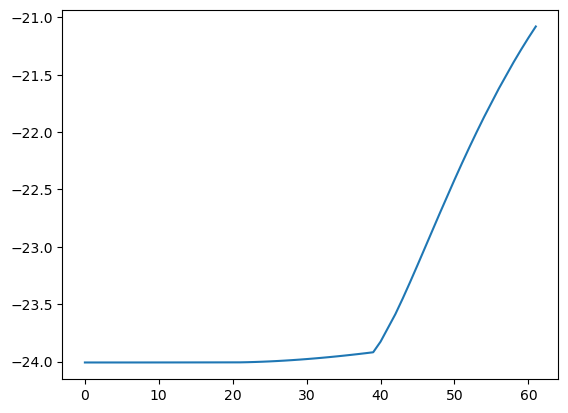

In [10]:
# plt.plot(resp_component)
# plt.plot(-ctrl_dif)
plt.plot(ctrl_resp)

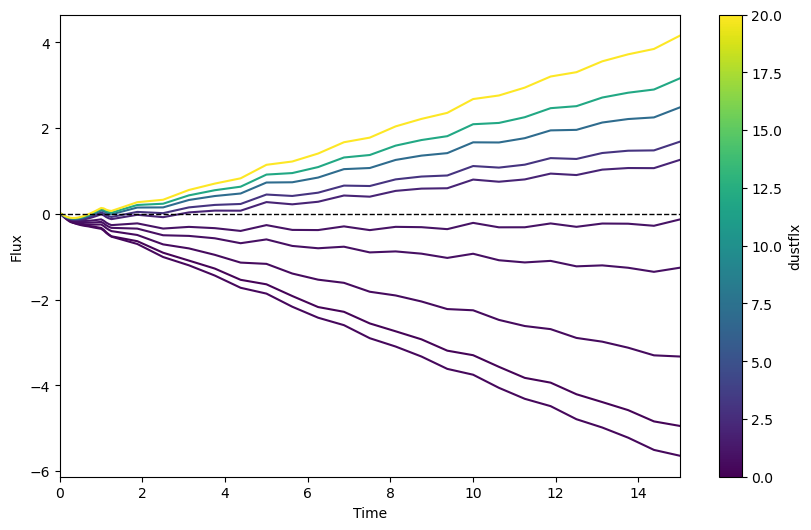

In [11]:
### set site
tsite = "site_311a" 

dfint = df.loc[(df["ctrl"] == False) & (df["set"] == ("int_"+var_fn)) & (df["var"] == cdr_var) & (df["site"] == tsite)]
dfx = df.loc[(df["ctrl"] == False) & (df["set"] == var_fn) & (df["var"] == cdr_var) & (df["site"] == tsite)]

# which to plot
int_on = True
thisdf = dfint
cdvar = "cdr_dif"

# Group by 'iteration'
grouped = thisdf.groupby('dustrate_ton_ha_yr')

# set cmap
norm = Normalize(vmin=df['dustrate_ton_ha_yr'].min(), vmax=df['dustrate_ton_ha_yr'].max())
cmap = plt.get_cmap('viridis')

# Plotting
plt.figure(figsize=(10, 6))
for name, group in grouped:
    if int_on:
        plt.plot(group['time'], group[cdvar]*group['time'], color=cmap(norm(name)))
    else:
        plt.plot(group['time'], group[cdvar], color=cmap(norm(name)))

plt.xlim(0,15)
plt.axhline(y=0, color='black', linestyle='--', linewidth=1)
# Adding labels and legend
plt.xlabel('Time')
plt.ylabel('Flux')
if cdvar in ["cdr_dif_component", "cdr_dif"]:
    if int_on:
        print("")
        #plt.ylim(-10,800)
    else:
        print("")
        # plt.ylim(-10, 30)
# plt.legend()
# Create colorbar
sm = ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=plt.gca())
cbar.set_label('dustflx')

# Show plot
plt.show()


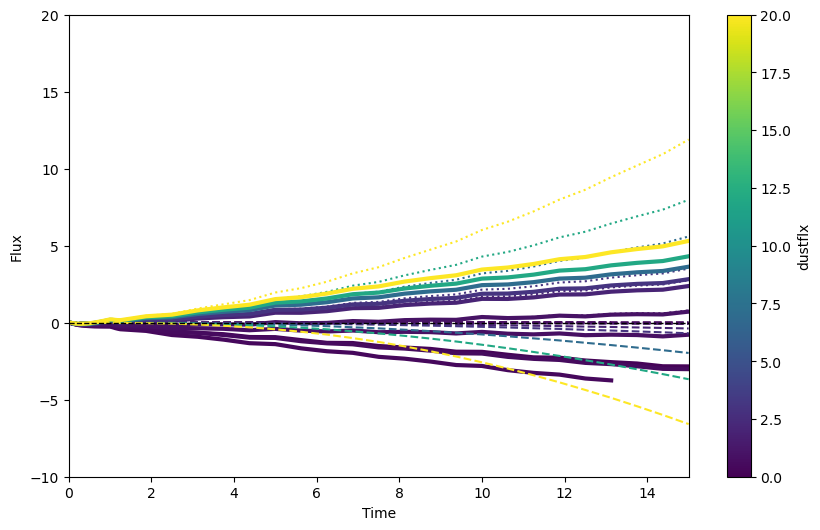

In [13]:
# --- dif component, resp component, and total
### set site
tsite = "site_311b" 

dfint = df.loc[(df["ctrl"] == False) & (df["set"] == ("int_"+var_fn)) & (df["var"] == cdr_var) & (df["site"] == tsite)]
dfx = df.loc[(df["ctrl"] == False) & (df["set"] == var_fn) & (df["var"] == cdr_var) & (df["site"] == tsite)]

# which to plot
int_on = True
thisdf = dfint
cdvarMain = "cdr_dif"
cdvar1 = "cdr_resp_component"
cdvar2 = cdvarMain + "_component"

# Group by 'iteration'
grouped = thisdf.groupby('dustrate_ton_ha_yr')

# set cmap
norm = Normalize(vmin=df['dustrate_ton_ha_yr'].min(), vmax=df['dustrate_ton_ha_yr'].max())
cmap = plt.get_cmap('viridis')

# Plotting
plt.figure(figsize=(10, 6))
for name, group in grouped:
    if int_on:
        plt.plot(group['time'], group[cdvarMain]*group['time'], color=cmap(norm(name)), linewidth=3)
        plt.plot(group['time'], group[cdvar1]*group['time'], color=cmap(norm(name)), linestyle="--")
        plt.plot(group['time'], group[cdvar2]*group['time'], color=cmap(norm(name)), linestyle="dotted")
    else:
        plt.plot(group['time'], group[cdvarMain], color=cmap(norm(name)), linewidth=3)
        plt.plot(group['time'], group[cdvar1], color=cmap(norm(name)), linestyle="--")
        plt.plot(group['time'], group[cdvar2], color=cmap(norm(name)), linestyle="dotted")

plt.xlim(0,15)
plt.axhline(y=0, color='black', linestyle='--', linewidth=1)
# Adding labels and legend
plt.xlabel('Time')
plt.ylabel('Flux')
if cdvar in ["cdr_dif_component", "cdr_dif"]:
    if int_on:
        print("")
        plt.ylim(-10,20)
    else:
        print("")
        # plt.ylim(-10, 30)
# plt.legend()
# Create colorbar
sm = ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=plt.gca())
cbar.set_label('dustflx')

# Show plot
plt.show()


In [23]:
dfxc.columns
# cdvar

Index(['time', 'tflx', 'adv', 'dif', 'rain', 'kfs', 'dlm', 'cc', 'tm', 'amsi',
       'ab', 'dp', 'cabd', 'qtz', 'ka', 'ill', 'g2', 'res', 'set', 'var',
       'spinrun', 'runname', 'site', 'ctrl', 'dustrate_ton_ha_yr',
       'cdr_dif_component', 'cdr_resp_component', 'cdr_adv_component',
       'cdr_dif', 'cdr_adv'],
      dtype='object')

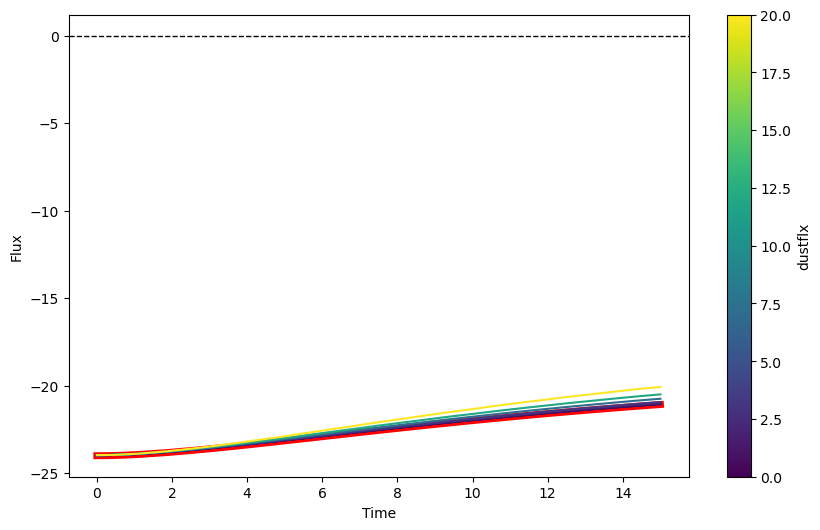

In [17]:
# --- compare control to runs
tsite = "site_311a" 

# which to plot
thisdf = "flx" # "flx" or "int"
cdvar = "g2"
thisvar = cdvar # [cdr_var, "co2g", "g2", "DIC"]

dfint = df.loc[(df["ctrl"] == False) & (df["set"] == ("int_"+var_fn)) & (df["var"] == cdr_var) & (df["site"] == tsite)]
dfx = df.loc[(df["ctrl"] == False) & (df["set"] == var_fn) & (df["var"] == cdr_var) & (df["site"] == tsite)]

dfintc = df.loc[(df["ctrl"] == True) & (df["set"] == ("int_"+var_fn)) & (df["var"] == cdr_var) & (df["site"] == tsite)]
dfxc = df.loc[(df["ctrl"] == True) & (df["set"] == var_fn) & (df["var"] == cdr_var) & (df["site"] == tsite)]


# Group by 'iteration'
if thisdf == "flx":
    grouped = dfx.groupby('dustrate_ton_ha_yr')    
    groupedc = dfxc.groupby('dustrate_ton_ha_yr')    
elif thisdf == "int":
    grouped = dfint.groupby('dustrate_ton_ha_yr')    
    groupedc = dfintc.groupby('dustrate_ton_ha_yr')  

# set cmap
norm = Normalize(vmin=df['dustrate_ton_ha_yr'].min(), vmax=df['dustrate_ton_ha_yr'].max())
cmap = plt.get_cmap('viridis')

# Plotting
plt.figure(figsize=(10, 6))
for name, group in groupedc:
    if thisdf == "int":
        plt.plot(group['time'], group[cdvar]*group['time'], color='red', linewidth=5)
    else:
        plt.plot(group['time'], group[cdvar], color='red', linewidth=5)

for name, group in grouped:
    if thisdf == "int":
        plt.plot(group['time'], group[cdvar]*group['time'], color=cmap(norm(name)))
    else:
        plt.plot(group['time'], group[cdvar], color=cmap(norm(name)))
        # plt.plot(group['time'], -group['dif'], color=cmap(norm(name)))

plt.axhline(y=0, color='black', linestyle='--', linewidth=1)
# Adding labels and legend
plt.xlabel('Time')
plt.ylabel('Flux')
if "dif" in cdvar:
    plt.ylim(0, 70)

# plt.ylim(-10, 10)
# plt.legend()

# Create colorbar
sm = ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=plt.gca())
cbar.set_label('dustflx')

# Show plot
plt.show()

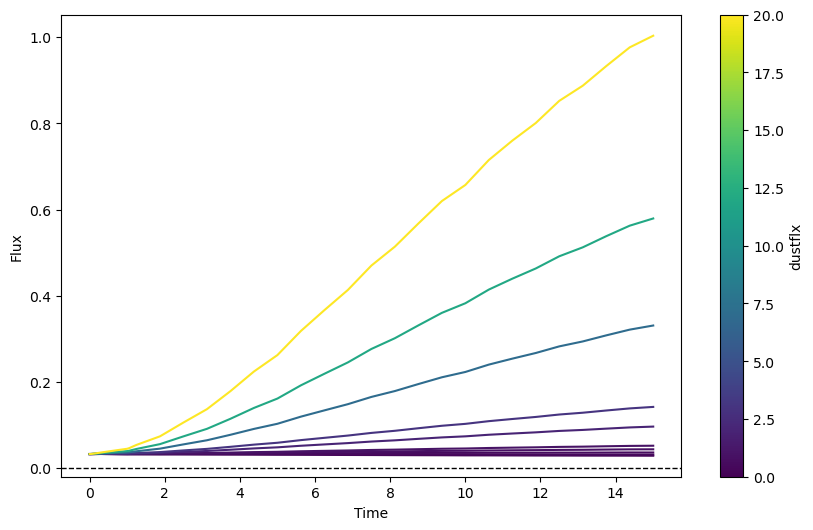

In [18]:
# --- subtract out control run (should be the same as cdr_resp_component *-1)
tsite = "site_311a" 

# which to plot
thisdf = "flx" # "flx" or "int"
cdvar = "g2"
thisvar = cdvar # [cdr_var, "co2g", "g2", "DIC"]

dfint = df.loc[(df["ctrl"] == False) & (df["set"] == ("int_"+var_fn)) & (df["var"] == cdr_var) & (df["site"] == tsite)]
dfx = df.loc[(df["ctrl"] == False) & (df["set"] == var_fn) & (df["var"] == cdr_var) & (df["site"] == tsite)]

dfintc = df.loc[(df["ctrl"] == True) & (df["set"] == ("int_"+var_fn)) & (df["var"] == cdr_var) & (df["site"] == tsite)]
dfxc = df.loc[(df["ctrl"] == True) & (df["set"] == var_fn) & (df["var"] == cdr_var) & (df["site"] == tsite)]


# Group by 'iteration'
if thisdf == "flx":
    grouped = dfx.groupby('dustrate_ton_ha_yr')    
    groupedc = dfxc.groupby('dustrate_ton_ha_yr')    
elif thisdf == "int":
    grouped = dfint.groupby('dustrate_ton_ha_yr')    
    groupedc = dfintc.groupby('dustrate_ton_ha_yr')  

# set cmap
norm = Normalize(vmin=df['dustrate_ton_ha_yr'].min(), vmax=df['dustrate_ton_ha_yr'].max())
cmap = plt.get_cmap('viridis')

# Plotting
plt.figure(figsize=(10, 6))
for name, group in grouped:
    for namec, groupc in groupedc:
        if thisdf == "int":
            plt.plot(group['time'], (group[cdvar]*group['time']).values - (groupc[cdvar]*groupc['time']).values, 
                     color=cmap(norm(name)))
        else:
            plt.plot(group['time'], group[cdvar].values - groupc[cdvar].values, color=cmap(norm(name)))

plt.axhline(y=0, color='black', linestyle='--', linewidth=1)
# Adding labels and legend
plt.xlabel('Time')
plt.ylabel('Flux')
if "dif" in cdvar:
    plt.ylim(0, 70)

# plt.ylim(-10, 10)
# plt.legend()

# Create colorbar
sm = ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=plt.gca())
cbar.set_label('dustflx')

# Show plot
plt.show()

In [69]:
(group[cdvar]*group['time']).values - (groupc[cdvar]*groupc['time']).values

array([1.43831228e-08, 2.20632070e-07, 2.59264409e-06, 7.74565690e-06,
       3.29214188e-05, 6.31374193e-05, 9.18933338e-05, 1.19554013e-04,
       1.45783501e-04, 1.70539452e-04, 1.93837512e-04, 2.15673243e-04,
       2.36063318e-04, 2.55005225e-04, 2.72514899e-04, 2.88591630e-04,
       3.03251102e-04, 3.16494007e-04, 3.28336559e-04, 3.38780972e-04,
       3.47845157e-04, 3.55534795e-04, 3.61874530e-04, 3.97266479e-04,
       5.66597012e-04, 7.84680143e-04, 8.76733679e-04, 9.52057375e-04,
       1.25663208e-03, 1.41806621e-03, 1.50360371e-03, 1.76063197e-03,
       2.00836022e-03, 2.13412116e-03, 2.29918138e-03, 2.63651921e-03,
       2.83178991e-03, 2.96418088e-03, 3.23380320e-03, 3.57592012e-03,
       3.74163085e-03, 6.59683882e-03, 1.01845936e-02, 1.42755120e-02,
       1.88038312e-02, 2.39130886e-02, 2.93909152e-02, 3.52284004e-02,
       4.15882096e-02, 4.82630059e-02, 5.53279393e-02, 6.27918273e-02,
       7.05907233e-02, 7.85957548e-02, 8.69910970e-02, 9.56119850e-02,
      

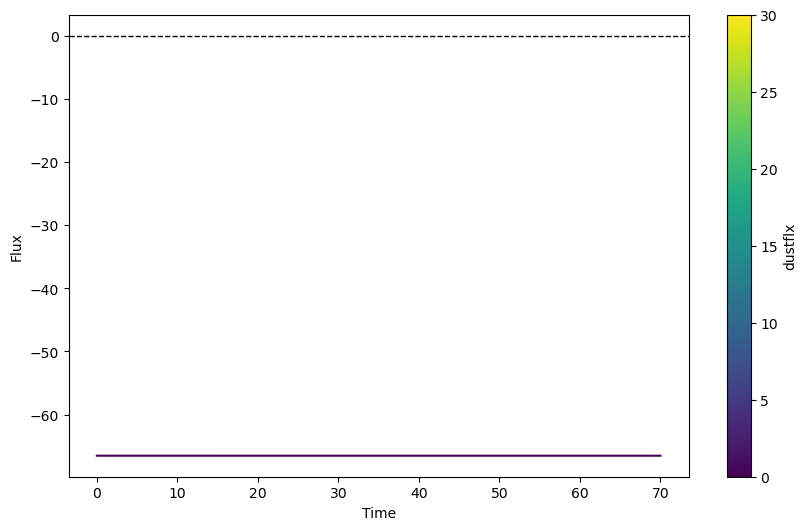

In [37]:
# --- repeat for control

tsite = "site_311" 

thisvar = cdr_var # [cdr_var, "co2g", "g2", "DIC"]

dfintc = df.loc[(df["ctrl"] == True) & (df["set"] == ("int_"+var_fn)) & (df["var"] == cdr_var) & (df["site"] == tsite)]
dfxc = df.loc[(df["ctrl"] == True) & (df["set"] == var_fn) & (df["var"] == cdr_var) & (df["site"] == tsite)]

# which to plot
thisdf = dfxc
cdvar = "g2"

# Group by 'iteration'
groupedc = thisdf.groupby('dustrate_ton_ha_yr')

# set cmap
norm = Normalize(vmin=df['dustrate_ton_ha_yr'].min(), vmax=df['dustrate_ton_ha_yr'].max())
cmap = plt.get_cmap('viridis')

# Plotting
plt.figure(figsize=(10, 6))
for name, group in groupedc:
    plt.plot(group['time'], group[cdvar], color=cmap(norm(name)))

plt.axhline(y=0, color='black', linestyle='--', linewidth=1)
# Adding labels and legend
plt.xlabel('Time')
plt.ylabel('Flux')
# plt.ylim(-10, 10)
# plt.legend()

# Create colorbar
sm = ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=plt.gca())
cbar.set_label('dustflx')

# Show plot
plt.show()

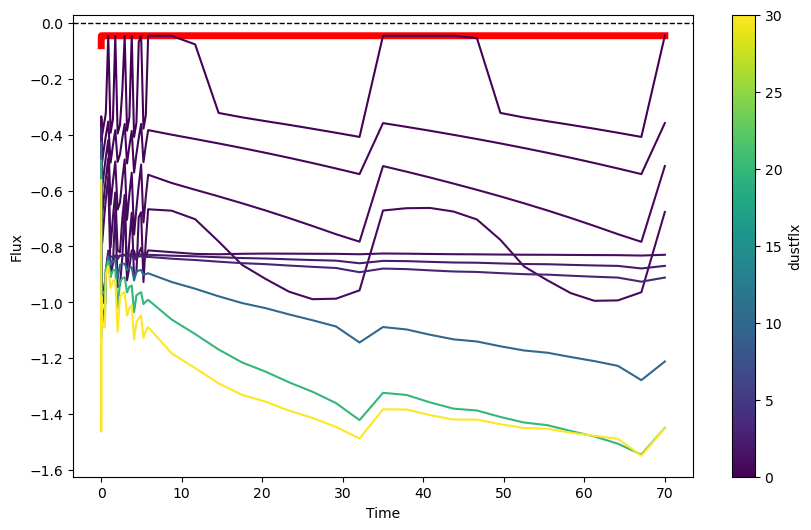

In [45]:
# --- compare control to runs
tsite = "site_311" 

thisvar = cdr_var # [cdr_var, "co2g", "g2", "DIC"]

dfint = df.loc[(df["ctrl"] == False) & (df["set"] == ("int_"+var_fn)) & (df["var"] == cdr_var) & (df["site"] == tsite)]
dfx = df.loc[(df["ctrl"] == False) & (df["set"] == var_fn) & (df["var"] == cdr_var) & (df["site"] == tsite)]

dfintc = df.loc[(df["ctrl"] == True) & (df["set"] == ("int_"+var_fn)) & (df["var"] == cdr_var) & (df["site"] == tsite)]
dfxc = df.loc[(df["ctrl"] == True) & (df["set"] == var_fn) & (df["var"] == cdr_var) & (df["site"] == tsite)]


# which to plot
thisdf = "flx" # "flx" or "int"
cdvar = "cc"

# Group by 'iteration'
if thisdf == "flx":
    grouped = dfx.groupby('dustrate_ton_ha_yr')    
    groupedc = dfxc.groupby('dustrate_ton_ha_yr')    
elif thisdf == "int":
    grouped = dfint.groupby('dustrate_ton_ha_yr')    
    groupedc = dfintc.groupby('dustrate_ton_ha_yr')  

# set cmap
norm = Normalize(vmin=df['dustrate_ton_ha_yr'].min(), vmax=df['dustrate_ton_ha_yr'].max())
cmap = plt.get_cmap('viridis')

# Plotting
plt.figure(figsize=(10, 6))
for name, group in groupedc:
    plt.plot(group['time'], group[cdvar], color='red', linewidth=5)

for name, group in grouped:
    plt.plot(group['time'], group[cdvar], color=cmap(norm(name)))

plt.axhline(y=0, color='black', linestyle='--', linewidth=1)
# Adding labels and legend
plt.xlabel('Time')
plt.ylabel('Flux')
if "dif" in cdvar:
    plt.ylim(0, 70)

# plt.ylim(-10, 10)
# plt.legend()

# Create colorbar
sm = ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=plt.gca())
cbar.set_label('dustflx')

# Show plot
plt.show()

In [50]:
dfintc

,time,tflx,adv,dif,rain,cc,inrt,g2,amnt,cc,...,spinrun,runname,site,ctrl,dustrate_ton_ha_yr,cdr_dif_component,cdr_resp_component,cdr_adv_component,cdr_dif,cdr_adv


In [35]:
(df.loc[(df["ctrl"] == False) & (df["set"] == "flx_co2sp") & (df["var"] == cdr_var)]['adv'].values == 0).all()

True

In [130]:
cond_case = (df["site"] == site) & (df['ctrl'] == False) & (df['runname'] == trun) & (df['set'] == thisset) & (df['var'] == cdr_var)
cond_case = (df["site"] == site) & (df['ctrl'] == True) & (df['runname'] == trun) & (df['set'] == thisset) & (df['var'] == cdr_var)
df.loc[cond_case, ]

,time,tflx,adv,dif,rain,cc,inrt,g2,amnt,cc,...,gps,mgbd,res,set,var,spinrun,runname,site,ctrl,dustrate_ton_ha_yr
18022,0.001751,-26.147306,0.0,252.877707,0.0,-89.040300,0.0,-24.211632,0.0,-89.040300,...,0.0,0.0,0.003226,flx_co2sp,co2g,site_311,liming_noFert_hist_fixedRate_site_311_1950-202...,site_311,False,5.0
18023,0.005834,-11.630257,0.0,95.320120,0.0,-24.748198,0.0,-24.211628,0.0,-24.748198,...,0.0,0.0,-0.007611,flx_co2sp,co2g,site_311,liming_noFert_hist_fixedRate_site_311_1950-202...,site_311,False,5.0
18024,0.017501,-1.552880,0.0,28.314412,0.0,-0.486782,0.0,-24.211595,0.0,-0.486782,...,0.0,0.0,0.000049,flx_co2sp,co2g,site_311,liming_noFert_hist_fixedRate_site_311_1950-202...,site_311,False,5.0
18025,0.029168,-0.151605,0.0,25.947103,0.0,-0.709718,0.0,-24.211526,0.0,-0.709718,...,0.0,0.0,-0.000090,flx_co2sp,co2g,site_311,liming_noFert_hist_fixedRate_site_311_1950-202...,site_311,False,5.0
18026,0.058334,0.398400,0.0,29.948821,0.0,-3.992403,0.0,-24.211192,0.0,-3.992403,...,0.0,0.0,-0.060320,flx_co2sp,co2g,site_311,liming_noFert_hist_fixedRate_site_311_1950-202...,site_311,False,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18916,69.703812,0.007875,0.0,18.443710,0.0,-0.094742,0.0,-18.579504,0.0,-0.094742,...,0.0,0.0,-0.006481,flx_co2sp,co2g,site_311,liming_noFert_hist_fixedRate_site_311_1950-202...,site_311,False,5.0
18917,69.787173,0.002529,0.0,18.572382,0.0,-0.155717,0.0,-18.580307,0.0,-0.155717,...,0.0,0.0,-0.006670,flx_co2sp,co2g,site_311,liming_noFert_hist_fixedRate_site_311_1950-202...,site_311,False,5.0
18918,69.870534,0.002629,0.0,18.574171,0.0,-0.169927,0.0,-18.581355,0.0,-0.169927,...,0.0,0.0,-0.006667,flx_co2sp,co2g,site_311,liming_noFert_hist_fixedRate_site_311_1950-202...,site_311,False,5.0
18919,69.953895,0.008184,0.0,18.500155,0.0,-0.151181,0.0,-18.582627,0.0,-0.151181,...,0.0,0.0,-0.006619,flx_co2sp,co2g,site_311,liming_noFert_hist_fixedRate_site_311_1950-202...,site_311,False,5.0


In [84]:
# --- from Yoshi (Jan 17, 2024)
# (-CO2_dif_exp-CO2_rsp_exp)-(-CO2_dif_spn-CO2_rsp_spn) - 0.14*(CO2_adv_exp - CO2_adv_spn).
# In the above equation CO2_dif denotes face values in the "diff" column for int_flux_gas-pco2.txt file,  
# CO2_adv in the column of "adv", CO2_rsp in the "g2" column (OM phase considered).  
# "exp" denotes ERW experiments while spn controls/spin-ups.

tdf_case = dfsite_notctrl.loc[(dfsite_notctrl['var'] == "co2g")]
tdf_ctrl = dfsite_ctrl.loc[(dfsite_ctrl['var'] == "co2g")]

# subset data
cond_case = dfsite_notctrl['var'] == "co2g"
cond_ctrl = dfsite_ctrl['var'] == "co2g"

# loop through sets
sets = tdf_case['set'].unique()
for thisset in sets:
    ttdf_case = tdf_case.loc[tdf_case['set'] == thisset]
    ttdf_ctrl = tdf_ctrl.loc[tdf_ctrl['set'] == thisset]
    # get each component
    dif_component = -1*(ttdf_case['dif'].values - ttdf_ctrl['dif'].values)
    resp_component = ttdf_case['g2'].values - ttdf_ctrl['g2'].values
    adv_component = ttdf_case['adv'].values - ttdf_ctrl['adv'].values
    
    # compute dif and adv versions
    cdr_dif = dif_component - np.maximum(resp_component, 0)
    cdr_adv = adv_component - np.maximum(resp_component, 0)
    # add back to df (ctrl CDR is zero by definition)
    ttdf_case.loc[:,'cdr_dif_component'], ttdf_ctrl.loc[:,'cdr_dif_component'] = dif_component, 0
    ttdf_case.loc[:,'cdr_resp_component'], ttdf_ctrl.loc[:,'cdr_resp_component'] = resp_component, 0
    ttdf_case.loc[:,'cdr_adv_component'], ttdf_ctrl.loc[:,'cdr_adv_component'] = adv_component, 0
    ttdf_case.loc[:,'cdr_dif'], ttdf_ctrl.loc[:,'cdr_dif'] = cdr_dif, 0
    ttdf_case.loc[:,'cdr_adv'], ttdf_ctrl.loc[:,'cdr_adv'] = cdr_adv, 0

In [105]:
# get each component
dif_component = -1*(ttdf_case['dif'].values - ttdf_ctrl['dif'].values)
resp_component = ttdf_case['g2'].values - ttdf_ctrl['g2'].values
adv_component = ttdf_case['adv'].values - ttdf_ctrl['adv'].values

# compute dif and adv versions
cdr_dif = dif_component - np.maximum(resp_component, 0)
cdr_adv = adv_component - np.maximum(resp_component, 0)

In [108]:
ttdf_case.loc[:,'cdr_dif_component'] = dif_component

In [109]:
# add back to df (ctrl CDR is zero by definition)
ttdf_case.loc[:,'cdr_dif_component'], ttdf_ctrl.loc[:,'cdr_dif_component'] = dif_component, 0
ttdf_case.loc[:,'cdr_resp_component'], ttdf_ctrl.loc[:,'cdr_resp_component'] = resp_component, 0
ttdf_case.loc[:,'cdr_adv_component'], ttdf_ctrl.loc[:,'cdr_adv_component'] = adv_component, 0
ttdf_case.loc[:,'cdr_dif'], ttdf_ctrl.loc[:,'cdr_dif'] = cdr_dif, 0
ttdf_case.loc[:,'cdr_adv'], ttdf_ctrl.loc[:,'cdr_adv'] = cdr_adv, 0


(-10.0, 10.0)

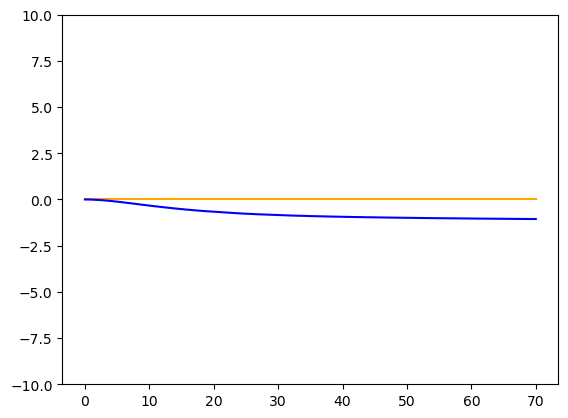

In [117]:
plt.plot(ttdf_case['time'], ttdf_case['cdr_adv_component'], c='orange')
plt.plot(ttdf_case['time'], ttdf_case['cdr_adv'], c='blue')
plt.ylim(-10,10)

In [ ]:
# --- compute the change in CO2 relative to t=0 in diffusion and advection
# create new column
pvars = ["co2g", "DIC"]
flxtype = ["dif", "adv"]  # these align with pvars

# loop through pvars
for tdx in range(len(pvars)):
    thisvar = pvars[tdx]
    thisflx = flxtype[tdx]
    thiscolname = thisflx + "_" + thisvar + "_change"
    df[thiscolname] = 0.  # initialize column
    
    # loop through sets
    for dset in pd.unique(df['set']):
        # subset data
        cond = (df['set'] == dset) & (df['var'] == thisvar)
        dfx = df[cond]
        # get initial flux
        diff_init = dfx.loc[dfx['time'].idxmin(), thisflx]
        # fill in new column
        df.loc[cond, thiscolname] = df.loc[cond, thisflx] - diff_init


In [119]:
cond_case = (dfsite_notctrl['var'] == "co2g") & (dfsite_notctrl['set'] == thisset)
cond_ctrl = (dfsite_ctrl['var'] == "co2g") & (dfsite_ctrl['set'] == thisset)

# get each component
-1*(dfsite_notctrl.loc[cond_case, 'dif'] - dfsite_ctrl.loc[cond_ctrl, 'dif'])

7208    NaN
7209    NaN
7210    NaN
7211    NaN
7212    NaN
         ..
18916   NaN
18917   NaN
18918   NaN
18919   NaN
18920   NaN
Name: dif, Length: 1802, dtype: float64

In [137]:
dfsite = df.loc[df['site'] == "site_411"]
# get control run
dfsite_ctrl = dfsite.loc[dfsite['ctrl'] == True]
dfsite_notctrl = dfsite.loc[dfsite['ctrl'] == False]

# loop through non-control runs
nonctrl_runs = dfsite_notctrl['runname'].unique()
for trun in nonctrl_runs:
    print(trun)
    # split into case and control
    tdf_case = dfsite_notctrl.loc[(dfsite_notctrl['var'] == "co2g") & (dfsite_notctrl['runname'] == trun)]
    tdf_ctrl = dfsite_ctrl.loc[(dfsite_ctrl['var'] == "co2g")]
    # compute cdr 
    # loop through sets
    sets = tdf_case['set'].unique()
    for thisset in sets:
        ttdf_case = tdf_case.loc[tdf_case['set'] == thisset]
        ttdf_ctrl = tdf_ctrl.loc[tdf_ctrl['set'] == thisset]
        
        # if case and control are different lengths, we need to interpolate
        # (this happens sometimes due to shifts in how the timesteps are handled in a given run)
        if len(ttdf_case) != len(tdf_ctrl):
            ctrl_dif = ttdf_ctrl.set_index('time')['dif'].reindex(ttdf_case['time']).interpolate(method='linear').values
            ctrl_resp = ttdf_ctrl.set_index('time')['g2'].reindex(ttdf_case['time']).interpolate(method='linear').values
            ctrl_adv = ttdf_ctrl.set_index('time')['adv'].reindex(ttdf_case['time']).interpolate(method='linear').values
        else:
            ctrl_dif = ttdf_ctrl['dif'].values
            ctrl_resp = ttdf_ctrl['g2'].values
            ctrl_adv = ttdf_ctrl['adv'].values
            
        # get each component
        dif_component = -1*(ttdf_case['dif'].values - ctrl_dif)
        resp_component = ttdf_case['g2'].values - ctrl_resp
        adv_component = ttdf_case['adv'].values - ctrl_adv
        
        # compute dif and adv versions
        cdr_dif = dif_component - np.maximum(resp_component, 0)
        cdr_adv = adv_component - np.maximum(resp_component, 0)

        # add back to df
        cond_case = (df["site"] == site) & (df['ctrl'] == False) & (df['runname'] == trun) & (df['set'] == thisset) & (df['var'] == "co2g")
        df.loc[cond_case, dif_c] = dif_component
        df.loc[cond_case, resp_c] = resp_component
        df.loc[cond_case, adv_c] = adv_component
        df.loc[cond_case, dif] = cdr_dif
        df.loc[cond_case, adv] = cdr_adv


,A,B,C
0,1,4,-9999
1,2,5,-9999
2,3,6,-9999


In [245]:
dfsite = df.loc[df['site'] == "site_411"]
# get control run
dfsite_ctrl = dfsite.loc[dfsite['ctrl'] == True]
dfsite_notctrl = dfsite.loc[dfsite['ctrl'] == False]

# loop through non-control runs
nonctrl_runs = dfsite_notctrl['runname'].unique()
dfsite_ctrl

,time,tflx,adv,dif,rain,cc,inrt,g2,amnt,cc,...,spinrun,runname,site,ctrl,dustrate_ton_ha_yr,cdr_dif_component,cdr_resp_component,cdr_adv_component,cdr_dif,cdr_adv


In [11]:
'{:d}\tbio-mixing style: 0-- no mixing, 1-- fickian mixing, 2-- homogeneous mixng, 3--- tilling, 4--- LABS mixing, if not defined 0 is taken\n'.format(int(3))

'3\tbio-mixing style: 0-- no mixing, 1-- fickian mixing, 2-- homogeneous mixng, 3--- tilling, 4--- LABS mixing, if not defined 0 is taken\n'